## mnist digit memoriser
Since neural networks are just function approximators, we can make a neural network memorise an mnist digit using SGD. 

In [1]:
import customnet as cn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape((60000, 784)) / 255.0, x_test.reshape((10000, 784)) / 255.0
y_train_ohv, y_test_ohv = np.zeros((60000, 10)), np.zeros((10000, 10))
for i in range(60000):
    y_train_ohv[i][y_train[i]] = 1
for i in range(10000):
    y_test_ohv[i][y_test[i]] = 1

In [3]:
ALPHA = 1e-2
BETA = 0.99
ITERATIONS = 10
idx = 1

model = cn.Model([784, 64, 784], ['sigmoid', 'relu'])
outputs = []
data = [x_train[idx]]
for i in range(ITERATIONS):
    model.SGD(data, data, batch_size=1, loss_fn='mse', alpha=ALPHA, beta=BETA, epochs=1)
    outputs.append(model.forward(data[0]).reshape((28, 28)))

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 124.69it/s]


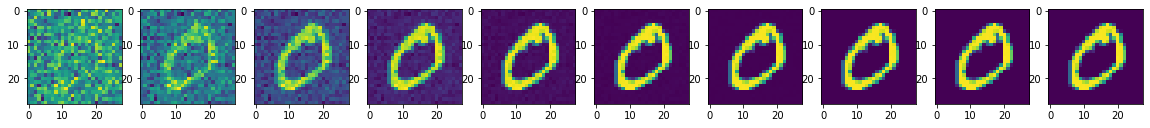

In [4]:
plt.figure(figsize=(20, 20))
for i in range(ITERATIONS):
    plt.subplot(1, 10, i + 1)
    plt.imshow(outputs[i])
plt.show()